# IoT Stream Zeiss 2022

This notebook is about storing and accessing data to/from a database. You will be guided through some examples. Afterwards you apply the learned to your use-case.

**Steps overview:**
<br>&emsp; `Step 1: Setup`
<br>&emsp;&emsp; - import libraries that you need for your program
<br>&emsp;&emsp; - create a connection to your database
<br>&emsp; `Step 2: Collection`
<br>&emsp;&emsp; - create a table in your database
<br>&emsp;&emsp; - collect and store data into your database
<br>&emsp; `Step 3: Visualization`
<br>&emsp;&emsp; - access the data in the database
<br>&emsp;&emsp; - create plots of the data
<br>&emsp; `Step 4: Your use-case`
<br>&emsp;&emsp; - set up a table according to your use-case requirements
<br>&emsp;&emsp; - collect data for your use-case and store it in the database
<br>&emsp; `Step 5: Close the connection to the database`
<br>&emsp;&emsp; - after all the work you just have to close the connection to your database

# Step 1: Setup

Install required package:

In [6]:
!pip install psycopg2_binary # version for macos
!pip install pandas

Defaulting to user installation because normal site-packages is not writeable
Looking in indexes: https://pypi.org/simple, https://www.piwheels.org/simple
Defaulting to user installation because normal site-packages is not writeable
Looking in indexes: https://pypi.org/simple, https://www.piwheels.org/simple
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 14.4/14.4 MB 1.5 MB/s eta 0:00:00m eta 0:00:010:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.3/10.3 MB 1.4 MB/s eta 0:00:00m eta 0:00:0136m0:00:010m
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Created wheel for numpy: filename=numpy-1.21.6-cp37-cp37m-linux_armv7l.whl size=15843762 sha256=b86dccda5566cc1ecc803d03a271156dc5e68c1584c6e758c35cc6125c0df140
  Stored in directory: /home/pi/.cache/pip/wheels/4e/7e/9e/0fde042ccff2493994076dac9c3fbd78feb444c3bd94eb386a
Successfully built numpy


Import the needed libraries:

In [7]:
import psycopg2
import pandas as pd
import time
from datetime import datetime
import random

Construct connection string for database and connect to it

In [8]:
conn = psycopg2.connect(dbname='postgres', user='nimda@iot-zeiss-2504', host='iot-zeiss-2504.postgres.database.azure.com', password='leadml-2022', port='5432', sslmode='require')
cursor = conn.cursor()
print("Connection established")

Connection established


# Step 2: Collection

**Azure:** Azure is the cloud service from Microsoft. A similar cloud service is AWS from Amazon.
<br>
**Azure Database:** We use a relational Database on Azure (PostgreSQL - Single Server) to store the collected data. A relational database is a collection of data items with pre-defined relationships between them. These items are organized as a set of tables with columns and rows. Tables are used to hold information about the objects to be represented in the database.
<br>
**SQL:** SQL is a standard language for storing, manipulating and retrieving data in databases. We will use it to communicate with our database.
<br>The SQL commands can be executed with "cursor.execute(  `SQL command`  )".

### Drop previous table of same name (here: 'inventory') if one exists

In [10]:
cursor.execute("DROP TABLE IF EXISTS felix_test;")
print("Finished dropping table (if existed)")

Finished dropping table (if existed)


### Create a table (with name "inventory")

**columns of the table:**
<br>&emsp;    `id` is our primary key and will be increased automatically (natural number, first datapoint has id=0)
<br>&emsp;    `air_sensor` could be the data of one of our sensors (decimal number)
<br>&emsp;    `sound_sensor` could be the data of one of our sensors (decimal number)
<br>&emsp;    `temperature_sensor` could be the data of one of our sensors (decimal number)
<br>&emsp;    `date` is the date of the creation of the datapoint (form: 'year-month-day')
<br>&emsp;    `time` is the time of creation of the datapoint (form: '00:00:00')

In [11]:
cursor.execute("CREATE TABLE felix_test (id serial PRIMARY KEY, air_sensor FLOAT8, sound_sensor FLOAT8, temperature_sensor FLOAT8, date DATE, time TIME);")
print("Finished creating table")

Finished creating table


### Collect and insert data into the table

In [12]:
# function to collect the data from the sensors
def collect_data():
    air_sensor = random.randint(0,100)
    sound_sensor = random.randint(0,100)
    temperature_sensor = random.randint(0,100)
    
    return air_sensor, sound_sensor, temperature_sensor

In [14]:
start = time.time()
end = time.time()

while end-start<10: # collect data for 10 sec
    
    # output the passed time
    print("passed time: ", end-start)
    end = time.time()
    
    # call the 'collect_data' function
    air_sensor, sound_sensor, temperature_sensor = collect_data()
    date = datetime.today().strftime("%Y-%m-%d")
    time = datetime.today().strftime("%H:%M:%S")
    
    # insert data into the database (here: "inventory")
    cursor.execute("INSERT INTO inventory (air_sensor, sound_sensor, temperature_sensor, date, time) VALUES (%s, %s, %s, %s, %s);", (air_sensor, sound_sensor, temperature_sensor, date, time))

AttributeError: 'str' object has no attribute 'time'

# Step 3: Visualization

### Read data from database

In [7]:
# Fetch all rows from table (here 'inventory')
cursor.execute("SELECT air_sensor, sound_sensor, temperature_sensor, date, time FROM inventory;")
rows = cursor.fetchall()
    
# Create DataFrame with rows
df = pd.DataFrame(rows, columns=["air_sensor", "sound_sensor", "temperature_sensor", "date", "time"])

# show the first 10 rows of it
df.head(10)

,air_sensor,sound_sensor,temperature_sensor,date,time
0,96.0,78.0,1.0,2022-05-02,08:55:34
1,53.0,65.0,50.0,2022-05-02,08:55:34
2,20.0,90.0,20.0,2022-05-02,08:55:34
3,56.0,9.0,6.0,2022-05-02,08:55:34
4,25.0,82.0,18.0,2022-05-02,08:55:34
5,63.0,74.0,65.0,2022-05-02,08:55:34
6,18.0,84.0,19.0,2022-05-02,08:55:34
7,33.0,4.0,78.0,2022-05-02,08:55:34
8,68.0,66.0,25.0,2022-05-02,08:55:34
9,45.0,62.0,78.0,2022-05-02,08:55:34


### Plot data 

<AxesSubplot:>

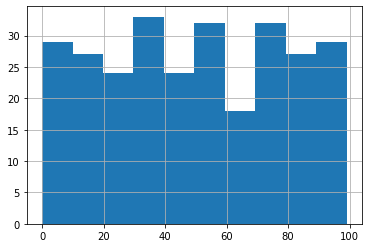

In [10]:
# create a histogram of the column 'air_sensor'
df["air_sensor"].hist()

# Step 4: Your use-case

You have completed the tutorial and you are now ready to go up and adjust the code according to your use-case. Good Luck :-)

# Step 5: Close the connection to the database

In [15]:
conn.commit()
cursor.close()
conn.close()
print("connection closed")

connection closed
